In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline


In [2]:
calendar_df = pd.read_csv('./dataset/calendar.csv')
listings_df = pd.read_csv('./dataset/listings.csv')
reviews_df = pd.read_csv('./dataset/reviews.csv')

In [3]:
calendar_df.shape


(1308890, 4)

In [4]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
listings_df.shape

(3585, 95)

In [6]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [7]:
reviews_df.shape

(68275, 6)

In [8]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [9]:
# listings_csv.dtypes
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [10]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [11]:
calendar_df.set_index('listing_id', inplace=True)


In [12]:
calendar_df.head()

,date,available,price
listing_id,,,
12147973,2017-09-05,f,NaN
12147973,2017-09-04,f,NaN
12147973,2017-09-03,f,NaN
12147973,2017-09-02,f,NaN
12147973,2017-09-01,f,NaN


In [13]:
# remove dollar, comma characters to convert price column to float
calendar_df.price = calendar_df.price.str.lstrip('$').str.replace(',', '')
calendar_df.price = calendar_df.price.astype('float')

In [14]:
# convert string date to datetime object
calendar_df.date = pd.to_datetime(calendar_df.date)

In [15]:
# test
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 12147973 to 14504422
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   date       1308890 non-null  datetime64[ns]
 1   available  1308890 non-null  object        
 2   price      643037 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 39.9+ MB


In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [17]:
reviews_df.set_index('id', inplace=True)

In [18]:
# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)

In [19]:
# test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   date           68275 non-null  datetime64[ns]
 2   reviewer_id    68275 non-null  int64         
 3   reviewer_name  68275 non-null  object        
 4   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.1+ MB


In [20]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [21]:
listings_df.set_index('id', inplace=True)

In [22]:
listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [23]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [24]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [25]:
# drop columns with no recordings

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [26]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]

In [27]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [28]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [29]:
# clean city column

listings_df.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan',
       'Milton', 'Dorchester', 'dorchester, boston ', 'South Boston',
       'Allston', 'ALLSTON'], dtype=object)

In [30]:
listings_df[listings_df.city=='波士顿']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,"If you are a student, I may give you 5% off.If...",...,NaN,NaN,NaN,f,f,strict,f,f,1,NaN


In [31]:
# drop row with unusual city name since there is only with observation associated with it

listings_df.drop(index=4625517, inplace=True)
listings_df.shape

(3254, 90)

In [32]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [33]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [34]:
listings_df.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [35]:
listings_df.fillna(0, inplace=True)

In [36]:
# test
listings_df.shape

(3254, 91)

In [37]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

calendar_jc = calendar_df
listings_jc = listings_df
reviews_jc = reviews_df

calendar_jc.head()
# # convert date from string to datetime object
# calendar_jc["date"] = pd.to_datetime(calendar_jc["date"])
# calendar_jc.date.describe(datetime_is_numeric=True)

,date,available,price
listing_id,,,
12147973,2017-09-05,f,NaN
12147973,2017-09-04,f,NaN
12147973,2017-09-03,f,NaN
12147973,2017-09-02,f,NaN
12147973,2017-09-01,f,NaN


In [38]:
# convert f to 0 (not available), and t to 1 (available)
calendar_jc["available"]=calendar_jc["available"].apply(lambda x:1 if x=="t" else 0)
calendar_jc.available.value_counts()

0    665853
1    643037
Name: available, dtype: int64

In [39]:
# compute availability (percentage of units available) of to each day
# store in calendar_daily dataframe
#calendar_daily = calendar.groupby("date")["available"].mean().reset_index()

calendar_daily = calendar_jc.groupby("date")["available"].agg(["sum","mean"]).reset_index()

calendar_daily.rename(columns={"sum":"available_count","mean":"availability"},inplace=True)                                         

calendar_daily.head()

,date,available_count,availability
0,2016-09-06,570,0.158951
1,2016-09-07,932,0.259900
2,2016-09-08,999,0.278583
3,2016-09-09,981,0.273564
4,2016-09-10,956,0.266592


C:\Users\28461\AppData\Local\Temp\ipykernel_23116\1401318121.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tickvalue)


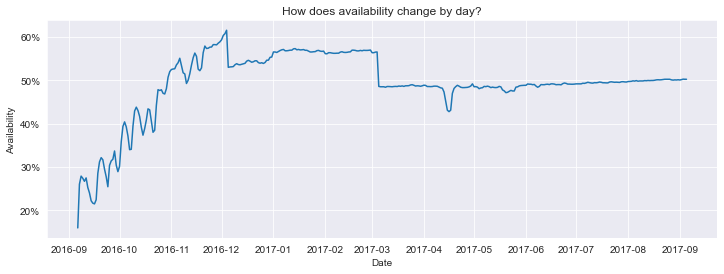

In [40]:
# view overall trend of availability by day
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))

ax=sns.lineplot(x=calendar_daily.date,y=calendar_daily.availability)
ax.set(xlabel="Date",ylabel="Availability", title="How does availability change by day?")

# set y tick values to % 
y_tickvalue=['{:,.0f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_tickvalue)

# set x tick increments 
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

plt.savefig("availability_trend_daily.png")

In [41]:
# explore trend throughout the week
calendar_jc["day_of_week"] = calendar_jc["date"].dt.dayofweek
calendar_weekly = calendar_jc.groupby("day_of_week")["available"].agg(["sum","mean"]).reset_index()
calendar_weekly.rename(columns={"sum":"available_count","mean":"availability"},inplace=True)
calendar_weekly


,day_of_week,available_count,availability
0,0,92413,0.495586
1,1,93332,0.491071
2,2,91816,0.492385
3,3,91202,0.489092
4,4,90998,0.487998
5,5,91068,0.488374
6,6,92208,0.494487


C:\Users\28461\AppData\Local\Temp\ipykernel_23116\1593621846.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tickvalue)


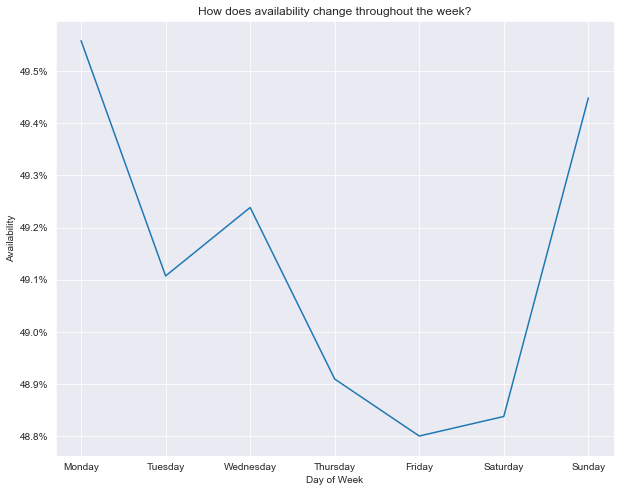

In [42]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.lineplot(x=calendar_weekly.day_of_week,y=calendar_weekly.availability)
ax.set(xlabel="Day of Week",ylabel="Availability", title="How does availability change throughout the week?")
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

# set y tick values to % 
y_tickvalue=['{:,.1f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_tickvalue)
plt.savefig("availability_weekly.png")


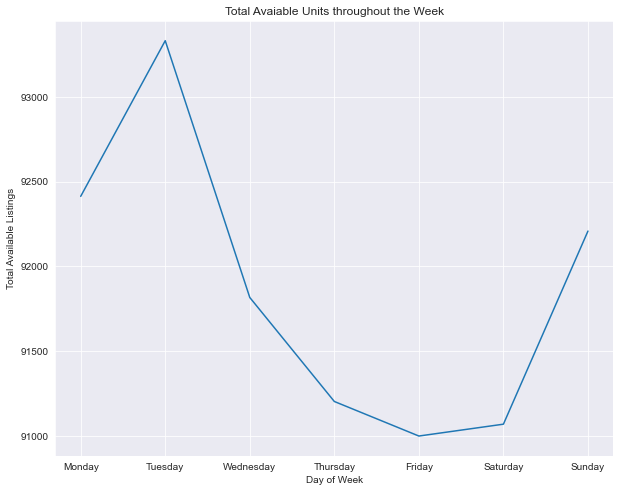

In [43]:
# Check total available units
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.lineplot(x=calendar_weekly.day_of_week,y=calendar_weekly.available_count)
ax.set(xlabel="Day of Week",ylabel="Total Available Listings", title="Total Avaiable Units throughout the Week")
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])


plt.savefig("available_count_weekly.png")

In [44]:
# select feature variables, and drop rows with one or more NAs 

listings_rm_nan = listings_jc.dropna(how="any",subset=["neighbourhood_cleansed","bedrooms","bathrooms",
                                                   "room_type","review_scores_rating","beds"],axis=0)
y=listings_rm_nan["price"]

# create dummy codes for categorical values 
X_categorical = listings_rm_nan[["room_type","neighbourhood_cleansed"]]
X_categorical_dummy_coded = pd.get_dummies(X_categorical)

# check how many rows left after removing nans, check the number of columns 
X_categorical_dummy_coded.shape

(3254, 28)

In [71]:
print(listings_jc.beds)

id
12147973    3.0
3075044     1.0
6976        1.0
1436513     2.0
7651065     2.0
           ... 
8373729     1.0
14844274    1.0
14585486    1.0
14603878    1.0
14504422    1.0
Name: beds, Length: 3254, dtype: float64


In [86]:
X_num = listings_rm_nan[["bedrooms","bathrooms","review_scores_rating","beds"]]

#concatenate columns of numerical and categorical features 
X=pd.concat([X_num,X_categorical_dummy_coded],axis=1)
# check to make sure X and y have equal number of rows
X.shape[0]==y.shape[0]

True

In [87]:
# split X, y to test and train 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy.random as nr

nr.seed(9988)
indx = range(X.shape[0])
indx = train_test_split(indx, test_size = 0.2)

X_train = X.iloc[indx[0],:]
y_train = np.ravel(y.iloc[indx[0]])
X_test = X.iloc[indx[1],:]
y_test = np.ravel(y.iloc[indx[1]])

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)
y_test_predicted = linear_model.predict(X_test)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


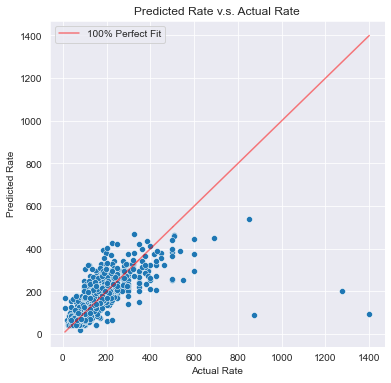

In [88]:
# plot y_test_predict and y_test
plt.figure(figsize=(6,6))
ax=sns.scatterplot(y_test,y_test_predicted)
sns.lineplot(x=y_test,y=y_test,ax=ax,color="r",alpha=0.5, label="100% Perfect Fit")
ax.set(xlabel="Actual Rate",ylabel="Predicted Rate", title="Predicted Rate v.s. Actual Rate")
plt.savefig("predicted_rate_vs_actual_rate.png",bbox_inches='tight')

In [89]:
import statsmodels.api as sm
results=sm.OLS(y_train,X_train).fit() #ordinary least squares 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     45.74
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.69e-213
Time:                        16:33:58   Log-Likelihood:                -16335.
No. Observations:                2603   AIC:                         3.273e+04
Df Residuals:                    2572   BIC:                         3.291e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
bedrooms                                          48.1583      6.210      7.755      0.000      35.982      60.335
bathrooms                                         28.7042      6.116      4.693      0.000      16.711      40.697
review_scores_rating                              -0.2419      0.066     -3.654      0.000      -0.372      -0.112
beds                                              16.5434      3.768      4.390      0.000       9.154      23.933
room_type_Entire home/apt                         87.1067     10.309      8.449      0.000      66.891     107.322
room_type_Private room                            25.9786      9.151      2.839      0.005       8.034      43.923
room_type_Shared room                              1.8374     18.241      0.101      0.920     -33.932      37.606
neighbourhood_cleansed_Allston                   -36.2204     10.140     -3.572      0.000     -56.105     -16.336
neighbourhood_cleansed_Back Bay                   72.9408     10.088      7.230      0.000      53.158      92.723
neighbourhood_cleansed_Bay Village                74.5526     31.555      2.363      0.018      12.678     136.428
neighbourhood_cleansed_Beacon Hill                66.6855     12.198      5.467      0.000      42.766      90.605
neighbourhood_cleansed_Brighton                  -32.4242     11.233     -2.886      0.004     -54.451     -10.397
neighbourhood_cleansed_Charlestown                16.6835     14.011      1.191      0.234     -10.790      44.157
neighbourhood_cleansed_Chinatown                  31.3233     16.982      1.845      0.065      -1.976      64.623
neighbourhood_cleansed_Dorchester                -51.9292     10.148     -5.117      0.000     -71.828     -32.030
neighbourhood_cleansed_Downtown                   50.0010     11.996      4.168      0.000      26.479      73.523
neighbourhood_cleansed_East Boston               -36.5927     12.358     -2.961      0.003     -60.825     -12.360
neighbourhood_cleansed_Fenway                     53.1791      9.712      5.476      0.000      34.135      72.223
neighbourhood_cleansed_Hyde Park                 -50.8107     25.054     -2.028      0.043     -99.939      -1.682
neighbourhood_cleansed_Jamaica Plain             -26.7784      9.303     -2.878      0.004     -45.021      -8.536
neighbourhood_cleansed_Leather District           35.8580     72.145      0.497      0.619    -105.611     177.327
neighbourhood_cleansed_Longwood Medical Area     -36.5317     56.066     -0.652      0.515    -146.470      73.407
neighbourhood_cleansed_Mattapan                  -45.5230     30.767     -1.480      0.139    -105.854      14.808
neighbourhood_cleansed_Mission Hill              -29.3384     13.975     -2.099      0.036   

Mean Square Error      = 10124.640468328622
Root Mean Square Error = 100.6212724443923
Mean Absolute Error    = 54.60027033021394
Median Absolute Error  = 35.45511933500174
R^2                    = 0.4226421346212085


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


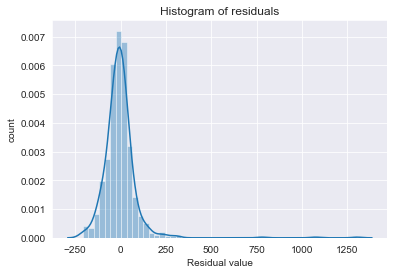

In [90]:
import sklearn.metrics as sklm #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    # https://statisticsbyjim.com/regression/interpret-r-squared-regression/
    print('R^2                    = ' + str(r2))
    


def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    # https://seaborn.pydata.org/generated/seaborn.distplot.html
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    



print_metrics(y_test, y_test_predicted) 
hist_resids(y_test, y_test_predicted)  

In [91]:
linear_model.coef_

array([ 48.15827991,  28.70419338,  -0.24194838,  16.54340979,
        48.79916977, -12.32900187, -36.4701679 , -40.81734532,
        68.34384339,  69.95567887,  62.08861428, -37.02114864,
        12.08656563,  26.7264337 , -56.52614035,  45.40409116,
       -41.1895995 ,  48.58223561, -55.40756047, -31.37534657,
        31.26111987, -41.12859429, -50.11986869, -33.93528338,
         6.46265078, -53.05056327, -28.39347657,  -1.8327781 ,
       126.05165132,  39.32118815, -10.50781273, -54.97855486])

In [92]:
linear_model.intercept_

42.90448202212045